In [3]:
import tensorflow as tf
import helper as hp
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
from IPython.core.display import HTML
import pickle
import copy
%matplotlib inline
import sys
#sys.path.append('/home/cesar/anaconda2/lib/python2.7/site-packages/cv2.so')
import cv2

In [5]:
#%run ./TrainAndTest.py

## Path to Data

To begin the translation is made only with a small text from english to spanish, since the training might take days even weeks using a real dictionary.

In [7]:

input_path = 'small_vocab_en'
target_path = 'small_vocab_fr'
#Padding since not all senteces will have the same size, EOS is the end of sentence
CODES = {'<PAD>': 0, '<EOS>': 1, '<UNK>': 2, '<GO>': 3}

import io

In [8]:
def data_load(path):
    files = os.path.join(path)
    files = files.encode('utf-8')
    with open(path, 'r') as f:
        data = f.read()
    return data

In [10]:


## Loading the two small texts
input_file = data_load(input_path)
target_file = data_load(target_path)
#spanish_file = spanish_file.encode('utf')

In [11]:
x = len(target_file)
print(x)
x = int(x)


10135742


In [12]:
print(target_file[:1000])
#eng_file = hp.load_file(input_file[:x])
#spanish_file = hp.load_file(target_file[:x])

new jersey est parfois calme pendant l' automne , et il est neigeux en avril .
les états-unis est généralement froid en juillet , et il gèle habituellement en novembre .
california est généralement calme en mars , et il est généralement chaud en juin .
les états-unis est parfois légère en juin , et il fait froid en septembre .
votre moins aimé fruit est le raisin , mais mon moins aimé est la pomme .
son fruit préféré est l'orange , mais mon préféré est le raisin .
paris est relaxant en décembre , mais il est généralement froid en juillet .
new jersey est occupé au printemps , et il est jamais chaude en mars .
notre fruit est moins aimé le citron , mais mon moins aimé est le raisin .
les états-unis est parfois occupé en janvier , et il est parfois chaud en novembre .
la chaux est son moins aimé des fruits , mais la banane est mon moins aimé.
il a vu un vieux camion jaune .
inde est pluvieux en juin , et il est parfois chaud en novembre .
ce chat était mon a


In [13]:
print(input_file[:1000])

new jersey is sometimes quiet during autumn , and it is snowy in april .
the united states is usually chilly during july , and it is usually freezing in november .
california is usually quiet during march , and it is usually hot in june .
the united states is sometimes mild during june , and it is cold in september .
your least liked fruit is the grape , but my least liked is the apple .
his favorite fruit is the orange , but my favorite is the grape .
paris is relaxing during december , but it is usually chilly in july .
new jersey is busy during spring , and it is never hot in march .
our least liked fruit is the lemon , but my least liked is the grape .
the united states is sometimes busy during january , and it is sometimes warm in november .
the lime is her least liked fruit , but the banana is my least liked .
he saw a old yellow truck .
india is rainy during june , and it is sometimes warm in november .
that cat was my most loved animal .
he dislikes grapefruit , limes , and lem

## Counting number of unique words and sentences

In [14]:
unique_words_inp = len({word: None for word in input_file.split()})
unique_words_tg = len({word: None for word in target_file.split()})
#words_inp = len({word:+1 for word in input_file.split()})


In [15]:
print('Number of unique words in English is :{} and Spanish is :{}'.format(unique_words_inp, unique_words_tg))

Number of unique words in English is :227 and Spanish is :355


In [16]:
sentences_inp = input_file.split('\n')
sentences_tg = target_file.split('\n')

In [17]:
print('Number of sentences in English is: {}'. format(len(sentences_inp)))
print('Number of sentences in Spanish is: {}'. format(len(sentences_tg)))

Number of sentences in English is: 137861
Number of sentences in Spanish is: 137861


In [18]:

words_target = [len(sentence.split()) for sentence in sentences_tg]
words_input = [len(sentence.split()) for sentence in sentences_inp]
avg_words_inp = (np.average(words_target))
avg_words_tg = (np.average(words_input))

In [19]:
#number of words and average of words

print('Average number of words in English in a sentence {}'.format(avg_words_inp))
print('Average number of words in Spanish in a sentence {}'.format(avg_words_tg))

Average number of words in English in a sentence 14.2266123124
Average number of words in Spanish in a sentence 13.2252776347


In [20]:
print('Longest sentence in Spanish {}'. format(max(words_input)))
print('Longest sentence in English {}'. format(max(words_target)))

Longest sentence in Spanish 17
Longest sentence in English 23


# Stats for words in English

# Stats for words in Spanish

In [21]:
stats_target.describe()

NameError: name 'stats_target' is not defined

In [24]:
def create_lookup_tables(xfile):
        #split text file without repetition
        vocab = set(xfile.split())
        
        #starting our table with CODES created on the second shell of this script, with PAD, EOS, etc
        
        vocab_int = copy.copy(CODES)
        for key, value in enumerate(vocab, len(CODES)):
            vocab_int[value] = key
            
        #We do the inverse process now, swapping keys and values   
        int_to_vocab = {key:value for value, key in vocab_int.items()} 
        return vocab_int, int_to_vocab

In [25]:
def preprocess_data_save(input_path, target_path, text_ids):
        #loading files into variables
        input_text = data_load(input_path)
        target_text = data_load(target_path)
        
        #changing text files to low case
        input_text = input_text.lower()
        target_text = target_text.lower()
        
        #creating lookup table, each word will be represented by a number the two variables returned
        #represent a way to check the 'id' of each word, similar to a dic in python (key, value)
        input_vocab_to_int, int_input_to_vocab = create_lookup_tables(input_text)
        target_vocab_to_int, int_target_to_vocab = create_lookup_tables(target_text)
        
        input_text, target_text = text_to_ids(input_text, target_text, input_vocab_to_int, target_vocab_to_int)
        
        
        ##Saving Data
        
        pickle.dump(((input_text, target_text), 
                     (input_vocab_to_int, target_vocab_to_int), 
                     (int_input_to_vocab, int_target_to_vocab)), open('preprocess_data.p', 'wb'))
        
        
        
    

In [26]:
def text_to_ids(input_txt, target_txt, input_vocab, target_vocab):
    
    input_text_id = [[input_vocab[word] for word in sentence.split()] for sentence in input_txt.split('\n')]
    target_text_id = [[target_vocab[word] for word in sentence.split()] for 
                     sentence in target_txt.split('\n')]
    
    #in case of not having EOS at the end of sentence add it
    for i in target_text_id:
        if i and i[-1] != target_vocab['<EOS>']:
            i += [target_vocab['<EOS>']]
    
    return input_text_id, target_text_id
    


In [27]:
def preprocess():
    return pickle.load(open('preprocess_data.p', mode='rb'))

In [28]:
def save_par(par):
    pickle.dump(par, open('par.p', 'wb'))

In [29]:
def load_par():
    return pickle.load(open('par.p', mode='rb'))

In [30]:
import warnings

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

Default GPU Device: /gpu:0


In [31]:

preprocess_data_save(input_path, target_path, text_to_ids)

In [32]:
(input_int, target_int), (source_vocab_int, target_vocab_int), _ = preprocess()


# Building Neural Network




# Input

In [33]:
def model():
    inputs = tf.placeholder(dtype=tf.int32, shape=[None, None], name='inputs')
    target = tf.placeholder(dtype=tf.int32, shape=[None, None], name='target')
    learn_rate = tf.placeholder(tf.float32)
    keep_prob = tf.placeholder(tf.float32, name='keep_prob') #probability that each element is kept

    return inputs, target, learn_rate, keep_prob

In [34]:
##Decoding Input

In [35]:
def decoding_input(target_data, target_vocab_int, batch_size):
    
    target_batches = tf.strided_slice(target_data, [0, 0], [batch_size, -1], [1, 1])
    decoder_input = tf.concat([tf.fill([batch_size, 1], target_vocab_int['<GO>']), target_batches], 1)
    
    return decoder_input

In [36]:
def encoding(rnn_input, rnn_size, num_layers, keep_prob):
    
    #encoder_cell = tf.contrib.rnn.LSTMCell(rnn_size)
    encoder_cell = tf.contrib.rnn.MultiRNNCell([tf.contrib.rnn.BasicLSTMCell(rnn_size) for _ in range(num_layers)])
    _, encoder_state = tf.nn.dynamic_rnn(encoder_cell, rnn_input, dtype=tf.float32)
    return encoder_state

# Decoder Logits

In [37]:
def decoder_logits(encoder_state, decoder_cell, decoder_embedded_input, seq_len, decoding_scope,
                  output_layer, keep_prob):
    
    #train_decoder = tf.contrib.legacy_seq2seq.dynamic_rnn_decoder(encoder_state)
    #contrib/seq2seq/python/ops/decoder_fn
    
    train_decoder = tf.contrib.seq2seq.simple_decoder_fn_train(encoder_state)
    train_pred, _, _ = tf.contrib.seq2seq.dynamic_rnn_decoder(decoder_cell, train_decoder, decoder_embedded_input,
                                                             seq_len, scope=decoding_scope)
    
    train_logits = output_layer(train_pred)
    train_logits = tf.nn.dropout(train_logits, keep_prob)
    
    return train_logits
    
    
    

In [38]:
def decoder_layer_logits(encoder_state, decoder_cell, decoder_embedded_input, seq_len, decoding_scope,
                  output_layer, keep_prob):
    
    decoder_cell = tf.contrib.rnn.LSTMCell(decoder_hidden_units)

    decoder_outputs, decoder_final_state = tf.nn.dynamic_rnn(
    decoder_cell, decoder_embedded_input,

    initial_state=encoder_state,

    dtype=tf.float32, time_major=True, scope="plain_decoder",)
    
    decoder_logits = tf.contrib.layers.linear(decoder_outputs, seq_len)
    decoder_prediction = tf.argmax(decoder_logits, 2)
    
    

In [39]:
tf.__version__
print(dir(tf.contrib.seq2seq))

['__builtins__', '__doc__', '__file__', '__name__', '__package__', '__path__', '_allowed_symbols', 'attention_decoder_fn_inference', 'attention_decoder_fn_train', 'dynamic_rnn_decoder', 'prepare_attention', 'sequence_loss', 'simple_decoder_fn_inference', 'simple_decoder_fn_train']


# Decoding Inference

In [40]:
def decoding_layer_inference(encoder_state, decoder_cell, decoder_embeddings, start_seq_id, end_seq_id, 
                   maximum_len, vocab_size, decoding_scope, output_layer, prob):
    
    inference_decoder = tf.contrib.seq2seq.simple_decoder_fn_inference(output_layer, encoder_state,
                                                                       decoder_embeddings, start_seq_id, end_seq_id,
                                                                       maximum_len - 1, vocab_size)
    inference_logits, _, _ = tf.contrib.seq2seq.dynamic_rnn_decoder(decoder_cell, inference_decoder,
                                                                    scope=decoding_scope)
    
    inference_logits = tf.nn.dropout(inference_logits, prob)
    return inference_logits



# Building the Decoding Layer

In [41]:
def decoding_layer(decoder_embedded_input, decoder_embeddings, encoder_state, vocab_size, 
                   seq_len, rnn_size, num_layers, target_vocab_int, prob):
    
    #decoder_cell = tf.contrib.rnn.LSTMCell(decoder_hidden_units)
    decoder_cell = tf.contrib.rnn.MultiRNNCell([tf.contrib.rnn.BasicLSTMCell(rnn_size) for _ in range(num_layers)])
    #decoder_cell_inf = tf.contrib.rnn.MultiRNNCell([tf.contrib.rnn.BasicLSTMCell(rnn_size) for layer in range(num_layers)])
    
    with tf.variable_scope("decoding") as decoding_scope:
        output_layer = lambda x:tf.contrib.layers.fully_connected(x, vocab_size, None, scope=decoding_scope)
        
        train_logits = decoder_logits(encoder_state, decoder_cell, decoder_embedded_input, 
                                            seq_len, decoding_scope, output_layer, prob)
   
    with tf.variable_scope("decoding", reuse=True) as decoding_scope_inf:
        decoding_scope.reuse_variables()
        inference_logits = decoding_layer_inference(encoder_state, decoder_cell, decoder_embeddings, 
                                                    target_vocab_int['<GO>'], target_vocab_int['<EOS>'], seq_len,
                                                   vocab_size, decoding_scope, output_layer, prob)
    return train_logits, inference_logits

    

# Building Neural Network

In [42]:
def seq2seq_model(input_data, target_data, keep_prob, batch_size, seq_len, input_vocab_size, target_vocab_size, 
                  encoder_embedding_size, decoder_embedding_size, rnn_size, num_layers, target_vocab_int):
    
    
    #Encoder Embedding
    encoder_embedding_input = tf.contrib.layers.embed_sequence(input_data, input_vocab_size, encoder_embedding_size)
    encoding_state = encoding(encoder_embedding_input, rnn_size, num_layers, keep_prob)
    processed_target_data = decoding_input(target_data, target_vocab_int, batch_size)
    
    #Decoding Embedding
    decoder_embedding = tf.Variable(tf.random_uniform([target_vocab_size, decoder_embedding_size]))
    decoder_embed_input = tf.nn.embedding_lookup(decoder_embedding, processed_target_data)
    
    train_logits, inference_logits = decoding_layer(decoder_embed_input, decoder_embedding, encoding_state,
                                                    target_vocab_size, seq_len, rnn_size, num_layers,
                                                    target_vocab_int, keep_prob)
    
    return train_logits, inference_logits

    

# Training Neural Network

In [43]:
epochs = 3
batch_size = 256
rnn_size = 75
num_layers = 2
encoding_embedding_size = 128
decoding_embedding_size = 128

learning_rate = 0.005
keep_probability = 0.5






In [44]:
#_, (source_vocab_int, target_vocab_int),  (source_int_to_vocab, target_int_to_vocab) = preprocess()
#print(target_int_to_vocab[:1000])

# Building the Graph

In [45]:
save_path = 'checkpoints/dev'
(input_int, target_int), (input_vocab_int, target_vocab_int), _ = preprocess()
longest_seq_input = max([len(seq) for seq in input_int])

train_graph = tf.Graph()
with train_graph.as_default():
    input_data, targets, lr,  keep_prob = model()
    seq_len = tf.placeholder_with_default(longest_seq_input, None, name='seq_len')
    input_shape = tf.shape(input_data)
    train_logits, inference_logits = seq2seq_model(tf.reverse(input_data, [-1]), targets, keep_prob, batch_size, seq_len,
                                                             len(input_vocab_int), len(target_vocab_int), 
                                                             encoding_embedding_size, decoding_embedding_size, 
                                                             rnn_size, num_layers, target_vocab_int)
    tf.identity(inference_logits, 'logits')
    with tf.name_scope("optimization"):
        #loss
        loss = tf.contrib.seq2seq.sequence_loss(train_logits, targets, tf.ones([input_shape[0], seq_len]))
        train_op = tf.train.AdamOptimizer(lr).minimize(loss)
        #optimizer = tf.train.AdamOptimizer(lr)
        #gradients = optimizer.compute_gradients(loss)
        #gradients_ = [(tf.clip_by_value(grad, -1., 1.), var) for grad, var in gradients if grad is not None]
        #train_op = optimizer_apply_gradients(gradients_)
    
    

In [46]:
import time

def get_accuracy(target, logits):
    x = target.shape[1]
    y = logits.shape[1]
    longest_seq = max(x, y)
    if longest_seq - x:
        target = np.pad(target, [(0,0), (0, longest_seq - x)], 'constant')
    if longest_seq - y:
        logits = np.pad(logits, [(0,0), (0, longest_seq - y), (0,0)], 'constant')
    return np.mean(np.equal(target, np.argmax(logits, 2)))

## Train the Neural Network

In [47]:
loss_hist = []

In [48]:
logs_path = "/cesar/home/Desktop/Final_NN/logs"
#tf.scalar_summary("logits", logits)
#summary_op = tf.merge_all_summaries()

#tf.summary.histogram("logits", logits)

In [49]:
source_train = input_int[batch_size:]
target_train = target_int[batch_size:]

source_val = hp.pad_batch(input_int[:batch_size])
target_val = hp.pad_batch(target_int[:batch_size])
#test_writer = tf.histogram_summary("loss", loss)
#writer = tf.train.SummaryWriter(logs_path, graph=tf.get_default_graph())
with tf.Session(graph=train_graph) as sess:
    sess.run(tf.global_variables_initializer())
    #writer = tf.train.SummaryWriter(logs_path, graph=tf.get_default_graph())
    for epoch in range(epochs):
        for batch, (source_batch, target_batch) in enumerate(hp.batch_data(source_train,
                                                                               target_train, batch_size)):
            
            start = time.time()
            _, loss_ = sess.run([train_op, loss], {input_data: source_batch, targets: target_batch, lr:learning_rate,
                                                 seq_len: target_batch.shape[1], keep_prob: keep_probability})
            batch_train_logits = sess.run(inference_logits, {input_data:source_batch, keep_prob:1.0})
            batch_valid_logits = sess.run(inference_logits, {input_data:source_val, keep_prob:1.0})
            
            #test_writer.add_summary(loss, batch)
            
            
            train = get_accuracy(target_batch, batch_train_logits)
            #tf.summary.histogram("logits", train)
            valid = get_accuracy(np.array(target_val), batch_valid_logits)
            end = time.time()
            if batch % 100 == 0:
                print('Epoch {:>3} Batch {:>4}/{} - Train Accuracy: {:>6.3f}, Validation Accuracy: {:>6.3f}, Loss: {:>6.3f}'
                  .format(epoch, batch, len(input_int) // batch_size, train, valid, loss_))
            loss_hist.append(loss_)
            #writer.add_summary(train_logits, epoch * batch_count + i)
            

    # Save Model
    saver = tf.train.Saver()
    saver.save(sess, save_path)
    print('Model Trained and Saved')
            
            
            
        
        
        


Epoch   0 Batch    0/538 - Train Accuracy:  0.234, Validation Accuracy:  0.316, Loss:  5.872
Epoch   0 Batch  100/538 - Train Accuracy:  0.418, Validation Accuracy:  0.461, Loss:  3.439
Epoch   0 Batch  200/538 - Train Accuracy:  0.546, Validation Accuracy:  0.562, Loss:  3.122
Epoch   0 Batch  300/538 - Train Accuracy:  0.640, Validation Accuracy:  0.634, Loss:  2.953
Epoch   0 Batch  400/538 - Train Accuracy:  0.675, Validation Accuracy:  0.675, Loss:  2.994
Epoch   0 Batch  500/538 - Train Accuracy:  0.755, Validation Accuracy:  0.718, Loss:  2.850
Epoch   1 Batch    0/538 - Train Accuracy:  0.750, Validation Accuracy:  0.727, Loss:  2.871
Epoch   1 Batch  100/538 - Train Accuracy:  0.796, Validation Accuracy:  0.799, Loss:  2.775
Epoch   1 Batch  200/538 - Train Accuracy:  0.853, Validation Accuracy:  0.839, Loss:  2.743
Epoch   1 Batch  300/538 - Train Accuracy:  0.865, Validation Accuracy:  0.847, Loss:  2.736
Epoch   1 Batch  400/538 - Train Accuracy:  0.879, Validation Accuracy

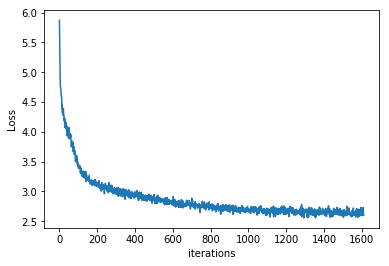

In [50]:
plt.plot(loss_hist)
plt.ylabel('Loss')
plt.xlabel('iterations')
plt.show()
#print(loss_hist)


In [51]:
def seq_to_seq(sent, vocab_int):
    word_id = [vocab_int.get(word, vocab_int['<UNK>']) for word in sent.split()]
    return word_id
    

In [52]:
def save_params(params):
    """
    Save parameters to file
    """
    pickle.dump(params, open('params.p', 'wb'))


In [53]:
def load_params():
    """
    Load parameters from file
    """
    return pickle.load(open('params.p', mode='rb'))


In [54]:
save_params(save_path)

In [55]:
_, (source_vocab_int, target_vocab_int),  (source_int_to_vocab, target_int_to_vocab) = preprocess()
#load_path = load_par()
load_path = load_params()

#(input_int, target_int), (source_vocab_int, target_vocab_int), _ = preprocess()
#(source_int_text, target_int_text), (source_vocab_to_int, target_vocab_to_int), _ = helper.load_preprocess()

In [ ]:
#print(target_int_to_vocab)

In [70]:
%run ./traininig.py

In [72]:
import traininig as tt
x = tt.func()


JANUARY



In [75]:
x = x.lower()
print(x)

january


In [76]:
translate = 'january .'
#import ptf.import_graph_def.
translate = seq_to_seq(x, source_vocab_int)
loaded_graph = tf.Graph()
with tf.Session(graph=loaded_graph) as sess:
    loader = tf.train.import_meta_graph(load_path + '.meta')
    loader.restore(sess, load_path)
    
    input_data = loaded_graph.get_tensor_by_name('inputs:0')
    logits = loaded_graph.get_tensor_by_name('logits:0')
    keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
    
    translate_logits = sess.run(logits, {input_data: [translate], keep_prob: 1.0})[0]
    
print('Input')
print('Words ids:       {}'. format([ids for ids in translate]))
print('English words:   {}'. format([source_int_to_vocab[i] for i in translate]))


print('\nPrediction')
print('Words ids:       {}'. format([i for i in np.argmax(translate_logits, 1)]))
print('French words:   {}'. format([target_int_to_vocab[i] for i in np.argmax(translate_logits, 1)]))


    
    
    
    


INFO:tensorflow:Restoring parameters from checkpoints/dev


INFO:tensorflow:Restoring parameters from checkpoints/dev


Input
Words ids:       [54]
English words:   ['january']

Prediction
Words ids:       [133, 42, 257, 1]
French words:   ['en', 'f\xc3\xa9vrier', '.', '<EOS>']


In [8]:
#import get_str as st

In [7]:
#import TrainAndTest as tt

In [6]:
#%run ./TrainAndTest.py